## Modelo Black-Scholes
Considerada una de las mejores vías para determinar el fair price de las opciones, son requeridas cinco variables: cotización del subyacente (S), strike price de la opción (K), DTE (T), tasa libre de riesgo (r) y volatilidad (sigma).

Tener en cuenta limitaciones y consideraciones del modelo:
- La opción solo se puede ejercer en el vencimiento (opción europea).
- No considera pago de dividendos durante la vigencia del contrato de opción.
- No existen costos de transacción y comisiones al comerciar con opciones.
- Asume una distribución normal de los retornos del subyacente.

In [17]:
from datetime import datetime, date
import numpy as np
import pandas as pd
from scipy.stats import norm
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()

### Estableciendo los valores de las variables S, X, T, r, y sigma

In [18]:
# precio del subyacente (última cierre)
df = pdr.get_data_yahoo('SPY', period='1y')
S = df['Close'].iloc[-1]
print(S)

[*********************100%***********************]  1 of 1 completed
398.5400085449219


In [19]:
# definiendo un strike price manualmente
K = 390

In [20]:
# tiempo de expiración de la opción (DTE)
expiry = '03-17-2023'
# se utiliza "datetime.strptime" para cambiar la fecha a formato string y poder trabajar con ella
T = (datetime.strptime(expiry, "%m-%d-%Y") - datetime.utcnow()).days/365
print(T) # nos da un % respecto a los 365 días

0.057534246575342465


In [21]:
# obteniendo r, el rendimiento de los bonos del tesoro a 10 años
r = (pdr.get_data_yahoo('^TNX', period='1y')['Close'].iloc[-1])/100
print(r)

[*********************100%***********************]  1 of 1 completed
0.03965000152587891


In [22]:
# sigma o valatilidad (realized)
returns = df['Close'].pct_change()
sigma = returns.std()*np.sqrt(252)
print(sigma)

0.23963756199817404


In [23]:
# listas las variables
print(S, K, T, r, sigma)

398.5400085449219 390 0.057534246575342465 0.03965000152587891 0.23963756199817404


### Definiendo la función Black-Scholes

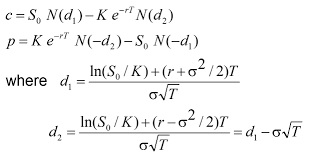

In [24]:
def black_scholes(S, K, T, r, sigma, option): 
    d1 = (np.log(S/K)+(r+sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1-sigma*np.sqrt(T)
    
    N = norm.cdf

    if option == 'call':
        price = S*N(d1)-K*np.exp(-r*T)*N(d2)
    elif option == 'put':
        price = K*np.exp(-r*T)*N(-d2)-S*N(-d1)

    return price

### Definiendo outputs

In [27]:
# el valor teórico de una opción call sería:
print(round(black_scholes(S, K, T, r, sigma, option='call'),  2))

14.52


In [28]:
# el valor teórico de una opción put sería:
print(round(black_scholes(S, K, T, r, sigma, option='put'),  2))

5.09
